# Anomaly Detection: Continious Variable Probabilistic Methods for Identifying Outliers

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from pydataset import data

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"    


In [4]:
df = pd.read_csv(url)

In [5]:
df.sample(3)

,id,dataset,x,y
21,21,II,5.0,4.74
23,23,III,8.0,6.77
5,5,I,14.0,9.96


In [6]:
df.shape

(44, 4)

In [7]:
df.groupby('dataset').describe()

id                                                   x       ...  \
        count  mean       std   min   25%   50%   75%   max count mean  ...   
dataset                                                                 ...   
I        11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  ...   
II       11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  ...   
III      11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  ...   
IV       11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  ...   

                        y                                                      
          75%   max count      mean       std   min    25%   50%   75%    max  
dataset                                                                        
I        11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV        8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

In [8]:
# this function generates all possible combinations of elements
# from the two input lists to get a combination
mycols=list(itertools.product(['x','y'], ['50%','mean','max','std']))

In [9]:
# thsi group it by dataset that is 1 to 4 
# now my df will ocntain '50%','mean','max','std' for each group 1 to 4
df.groupby("dataset").describe()[mycols]

x                          y                           
         50% mean   max       std   50%      mean    max       std
dataset                                                           
I        9.0  9.0  14.0  3.316625  7.58  7.500909  10.84  2.031568
II       9.0  9.0  14.0  3.316625  8.14  7.500909   9.26  2.031657
III      9.0  9.0  14.0  3.316625  7.11  7.500000  12.74  2.030424
IV       8.0  9.0  19.0  3.316625  7.04  7.500909  12.50  2.030579

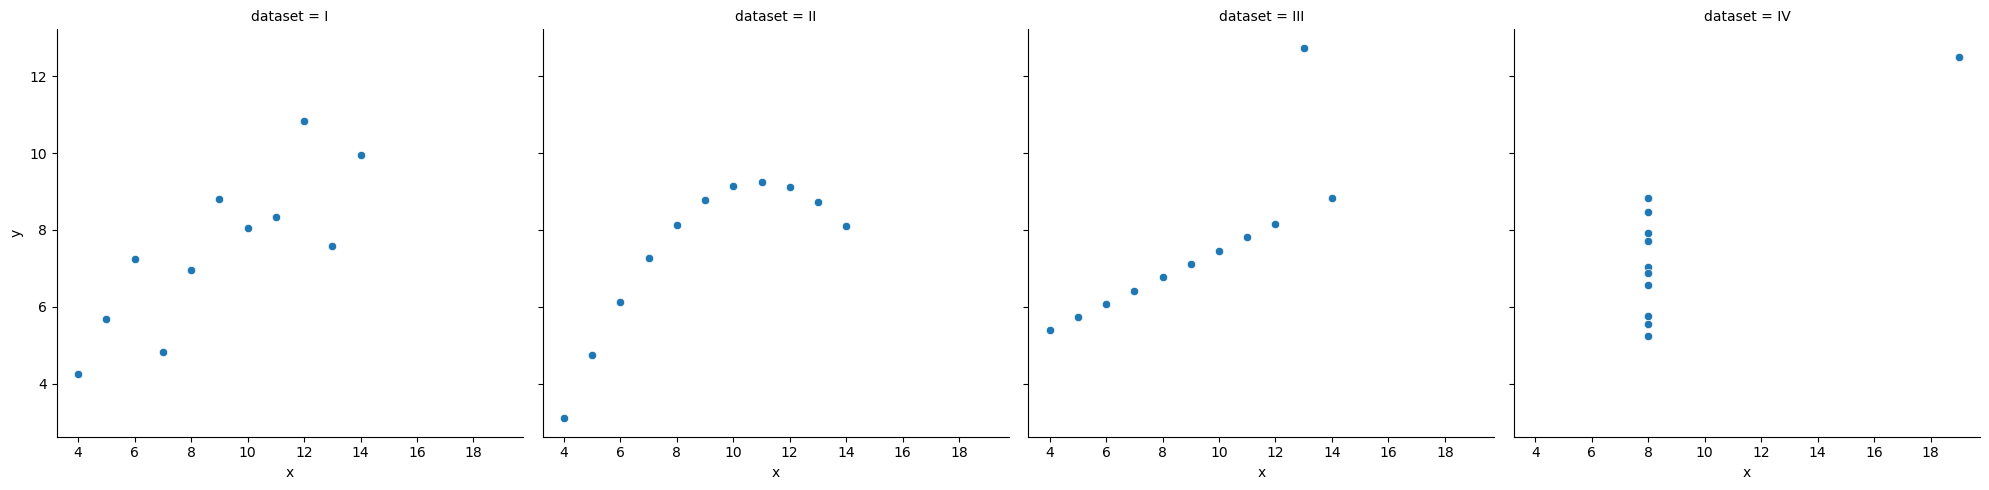

In [10]:
sns.relplot(x='x', y='y', col='dataset', data=df)

### Ascombe's Quartet

In [11]:
#call the url we are wanting to use
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

#read in that csv using pandas
df = pd.read_csv(url)

In [12]:
df.head()

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       44 non-null     int64  
 1   dataset  44 non-null     object 
 2   x        44 non-null     float64
 3   y        44 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.5+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,44.0,21.500000,12.845233,0.0,10.7500,21.50,32.2500,43.00
x,44.0,9.000000,3.198837,4.0,7.0000,8.00,11.0000,19.00
y,44.0,7.500682,1.958925,3.1,6.1175,7.52,8.7475,12.74


In [15]:
df.groupby("dataset").describe()

id                                                   x       ...  \
        count  mean       std   min   25%   50%   75%   max count mean  ...   
dataset                                                                 ...   
I        11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  ...   
II       11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  ...   
III      11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  ...   
IV       11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  ...   

                        y                                                      
          75%   max count      mean       std   min    25%   50%   75%    max  
dataset                                                                        
I        11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV        8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

In [16]:
#let's break this down a bit further using itertools
#essentially, I want to see the median and mean of x and y only
mycols = list(itertools.product(['x','y'], ['50%', 'mean', 'max', 'std']))

In [17]:
df.groupby("dataset").describe()[mycols]

x                          y                           
         50% mean   max       std   50%      mean    max       std
dataset                                                           
I        9.0  9.0  14.0  3.316625  7.58  7.500909  10.84  2.031568
II       9.0  9.0  14.0  3.316625  8.14  7.500909   9.26  2.031657
III      9.0  9.0  14.0  3.316625  7.11  7.500000  12.74  2.030424
IV       8.0  9.0  19.0  3.316625  7.04  7.500909  12.50  2.030579

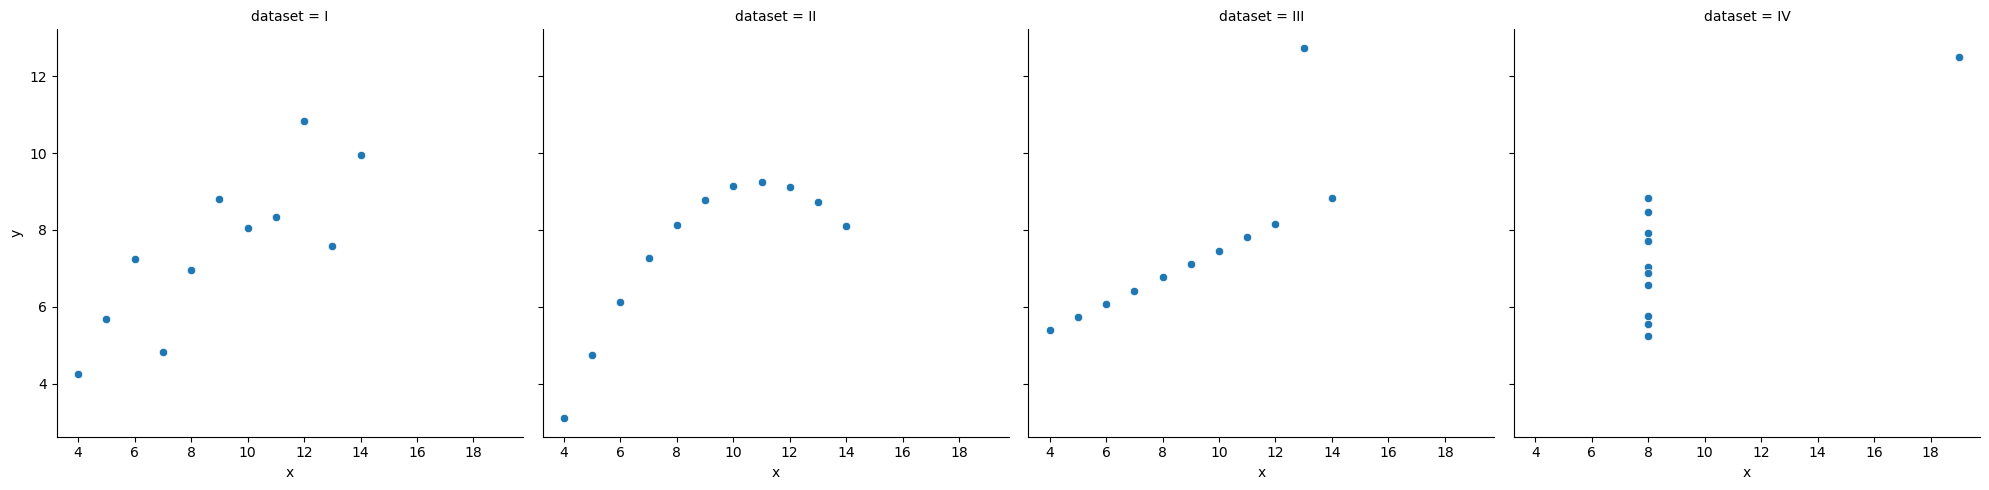

In [18]:
sns.relplot(x='x', y='y', col='dataset', data=df)

In [25]:
x = np.random.normal(50,40, size=1000)


In [27]:
zscores=pd.Series((x-x.mean())/x.std())

In [28]:
x[zscores.abs()>=2]

array([-29.59666593, -38.61821803, 156.93850876, 149.07136056,
       159.29249719, -55.55274898, -42.18200573, 137.24643667,
       159.76916895, -48.51922388, -73.94885711, 148.38724585,
       -37.82975762, -30.52809771, 136.7259116 , -32.83313109,
       168.81662182, -38.33879681, -47.75609305, -35.28594479,
       -84.09049434, 151.57468312, 162.2097508 , -29.44259613,
       132.9621086 , 136.22212506, 167.75810779, 136.99429864,
       145.50245332, 154.29517174, 149.33942213, 133.07421333,
       152.09186623, 139.8613676 , -77.93511641, -40.54617865,
       -42.74992416, 144.31989576, 145.40158439, 138.02396168,
       -69.2146871 , -42.30298322, -56.28105004])

In [29]:
len(x[zscores.abs()>=2])

43

In [30]:
x[zscores.abs()>=3]

array([-73.94885711, -84.09049434, -77.93511641])

## Code it out

In [32]:
swiss = data('swiss')

In [33]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [35]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


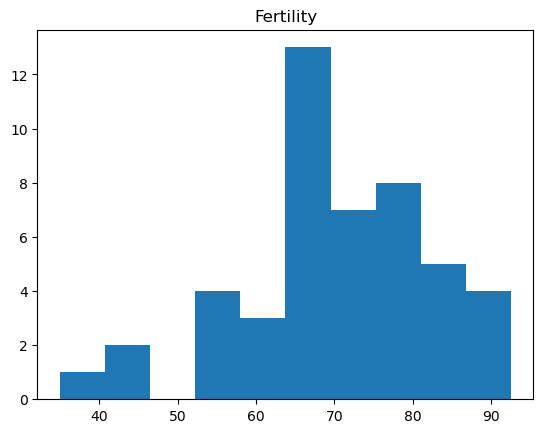

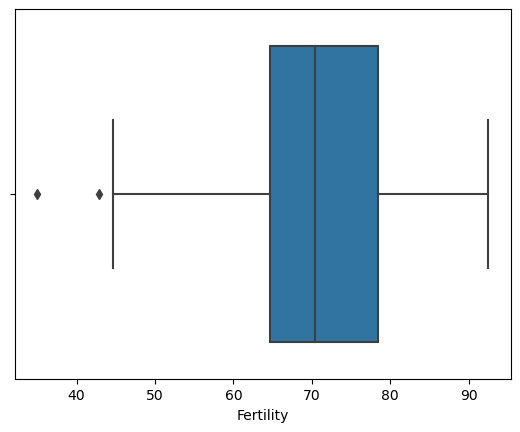

--------


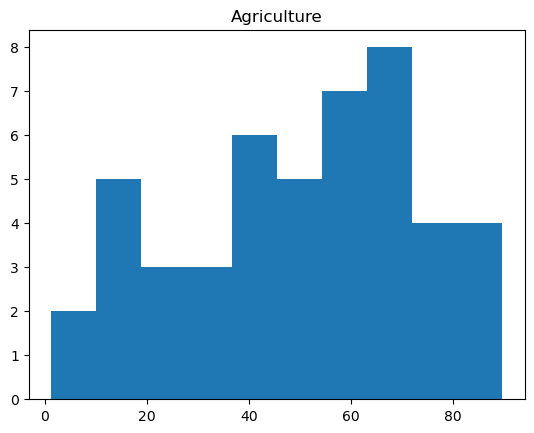

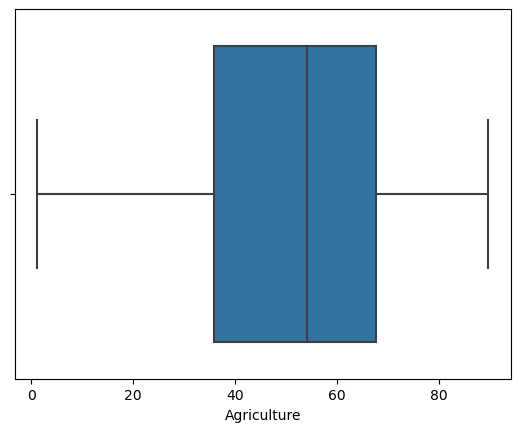

--------


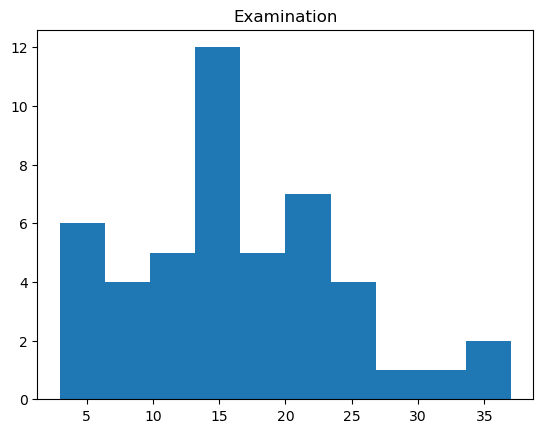

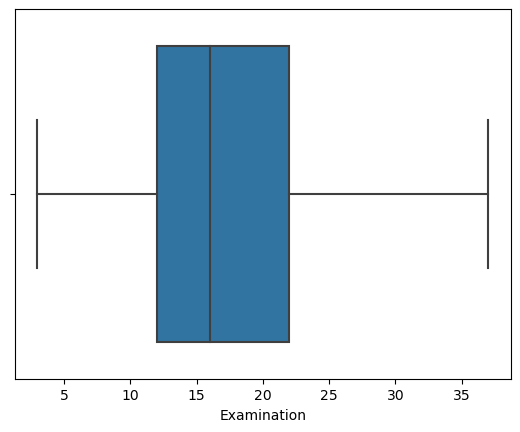

--------


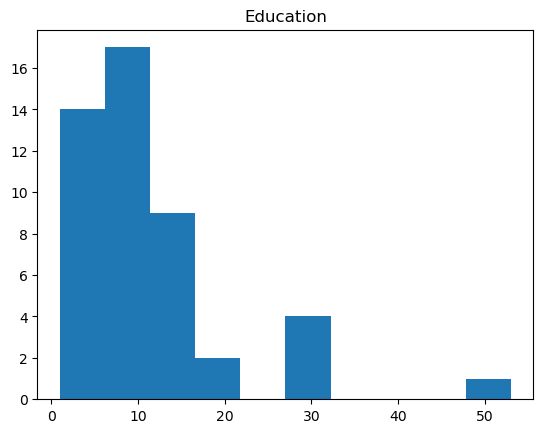

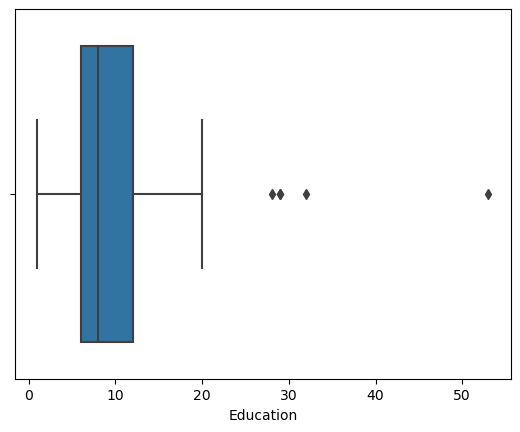

--------


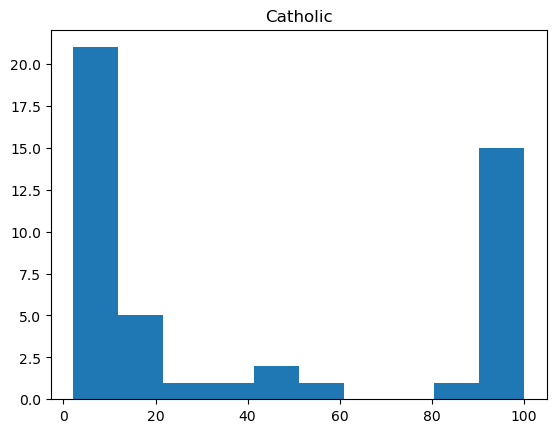

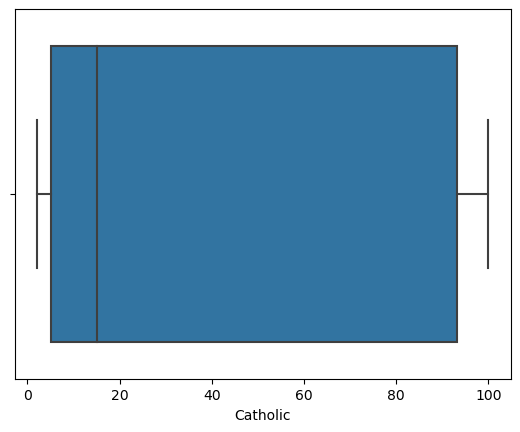

--------


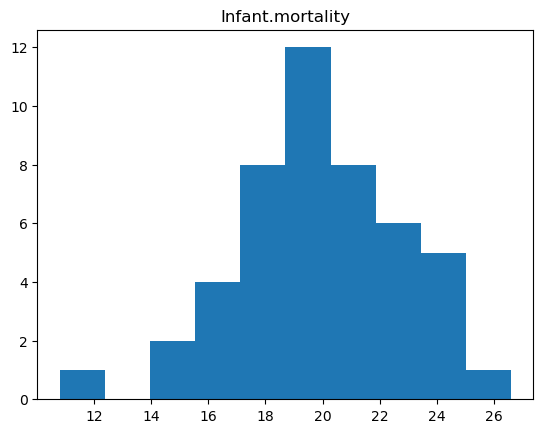

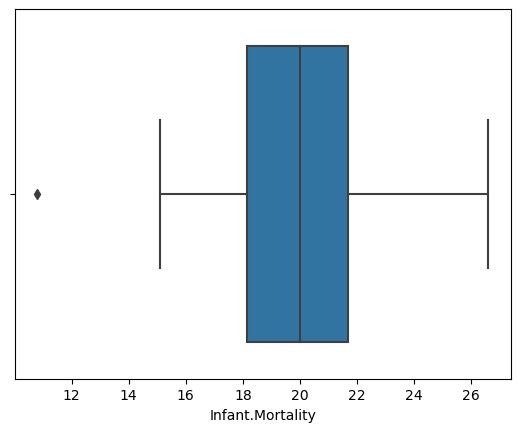

--------


In [37]:
cols = swiss.columns.to_list()
for col in cols:
    plt.hist(swiss[col])
    plt.title(col.replace('_', ' ').capitalize())
    plt.show()
    sns.boxplot(data=swiss, x=col)
    plt.show()
    print('--------')

Takeaways:

Fertility: There appear to be some outliers here with the break in the histogram and the box plot
Agriculture: no evident outliers
Examination: no evident outliers
Education: appears to have several outliers
Catholic: In the histogram there appears to be an outlier, but the boxplot doesn't show it
Infant.Mortality: there does appear to be an outlier

## IQR

In [38]:
swiss.Examination.quantile(0.25)

12.0

In [39]:
multiplier = 1.5

In [40]:
q1 = swiss.Examination.quantile(0.25)
q3 = swiss.Examination.quantile(0.75)
iqr = q3-q1

In [41]:
q1, q3, iqr

(12.0, 22.0, 10.0)

In [42]:
inner_lower_fence= q1-(multiplier *iqr)
inner_upper_fence = q3+(multiplier *iqr)

In [43]:
swiss[(swiss['Examination'] < inner_lower_fence) | (swiss['Examination'] > inner_upper_fence)]


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality


<Axes: xlabel='Examination'>

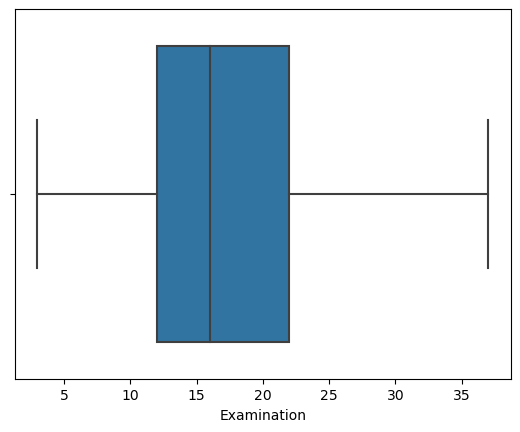

In [44]:
sns.boxplot(data=swiss, x='Examination')

## Using Z-score

In [45]:
swiss['infant_mortality_zscores'] = (swiss['Infant.Mortality'] - swiss['Infant.Mortality'].mean()) / swiss['Infant.Mortality'].std()


In [46]:
swiss['infant_mortality_zscores']

Courtelary      0.775037
Delemont        0.775037
Franches-Mnt    0.088388
Moutier         0.122720
Neuveville      0.225718
Porrentruy      2.285664
Broye           1.255691
Glane           1.702013
Gruyere         0.363047
Sarine          1.530350
Veveyse         1.564683
Aigle          -1.181913
Aubonne        -0.289269
Avenches        0.946699
Cossonay       -0.426599
Echallens       0.431712
Grandson        0.019723
Lausanne        0.088388
La Vallee      -3.138862
Lavaux          0.019723
Morges         -0.666926
Moudon          0.843702
Nyone          -1.113248
Orbe           -1.593902
Oron            0.363047
Payerne         1.324356
Paysd'enhaut   -0.666926
Rolle          -1.250578
Vevey           0.328715
Yverdon         0.878034
Conthey        -1.662567
Entremont      -0.048942
Herens         -0.563929
Martigwy       -0.186272
Monthey         0.088388
St Maurice     -0.735591
Sierre         -1.250578
Sion           -0.632594
Boudry          0.122720
La Chauxdfnd    0.191385


In [47]:
swiss[swiss['infant_mortality_zscores'].abs() >=3]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,infant_mortality_zscores
La Vallee,54.3,15.2,31,20,2.15,10.8,-3.138862


<Axes: xlabel='Infant.Mortality'>

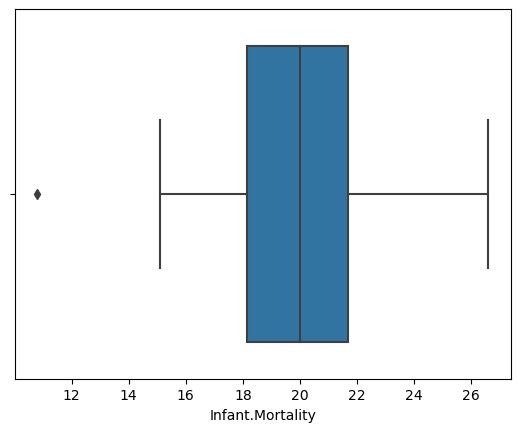

In [48]:
sns.boxplot(data = swiss, x ='Infant.Mortality')

## Examination

In [49]:
swiss['examination_zscores'] = (swiss['Examination'] - swiss['Examination'].mean()) / swiss['Examination'].std()


In [50]:
swiss['examination_zscores']

Courtelary     -0.186686
Delemont       -1.314805
Franches-Mnt   -1.440152
Moutier        -0.562726
Neuveville      0.064007
Porrentruy     -0.938766
Broye          -0.061340
Glane          -0.312033
Gruyere        -0.562726
Sarine         -0.061340
Veveyse        -0.312033
Aigle           0.565393
Aubonne        -0.312033
Avenches        0.314700
Cossonay        0.690739
Echallens       0.189353
Grandson        0.064007
Lausanne        1.192126
La Vallee       1.818858
Lavaux          0.314700
Morges          0.690739
Moudon         -0.312033
Nyone           0.690739
Orbe            0.440046
Oron           -0.562726
Payerne        -0.312033
Paysd'enhaut   -1.314805
Rolle          -0.061340
Vevey           1.066779
Yverdon        -0.186686
Conthey        -1.690845
Entremont      -1.189459
Herens         -1.440152
Martigwy       -0.562726
Monthey        -1.189459
St Maurice     -0.938766
Sierre         -1.690845
Sion           -0.437379
Boudry          1.192126
La Chauxdfnd    1.568165


In [51]:
swiss[swiss['examination_zscores'].abs() >=2]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,infant_mortality_zscores,examination_zscores
Neuchatel,64.4,17.6,35,32,16.92,23.0,1.049696,2.320244
V. De Geneve,35.0,1.2,37,53,42.34,18.0,-0.666926,2.570937


In [52]:
#IQR
inner_multiplier = 1.5
q1 = swiss['Infant.Mortality'].quantile(0.25)
q3= swiss['Infant.Mortality'].quantile(0.75)
iqr= q3- q1

In [53]:
inner_lower_fence = q1 - (inner_multiplier * iqr)
inner_upper_fence = q3 + (inner_multiplier * iqr)

In [54]:
swiss[(swiss['Infant.Mortality'] < inner_lower_fence) | (swiss['Infant.Mortality'] > inner_upper_fence)]


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,infant_mortality_zscores,examination_zscores
La Vallee,54.3,15.2,31,20,2.15,10.8,-3.138862,1.818858


#### Take away

* 2 standard deviations contains 95% of the data
* We might want to investigate examination further